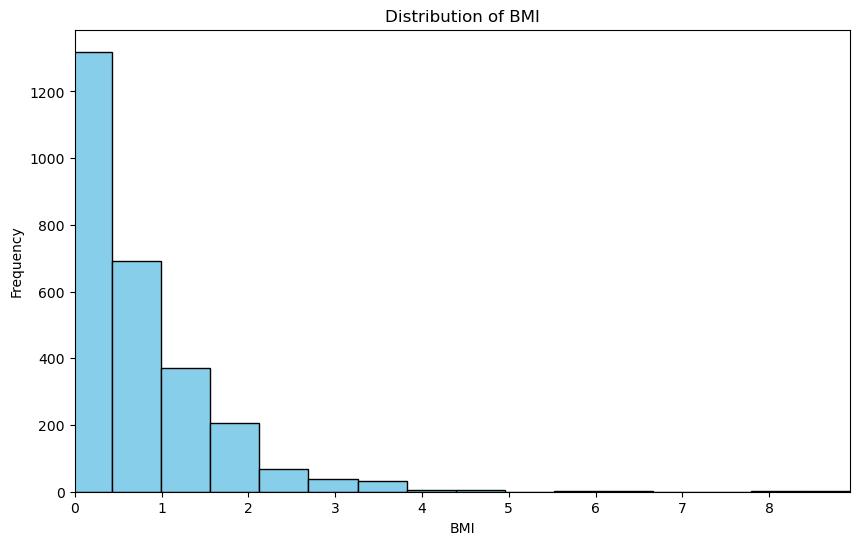

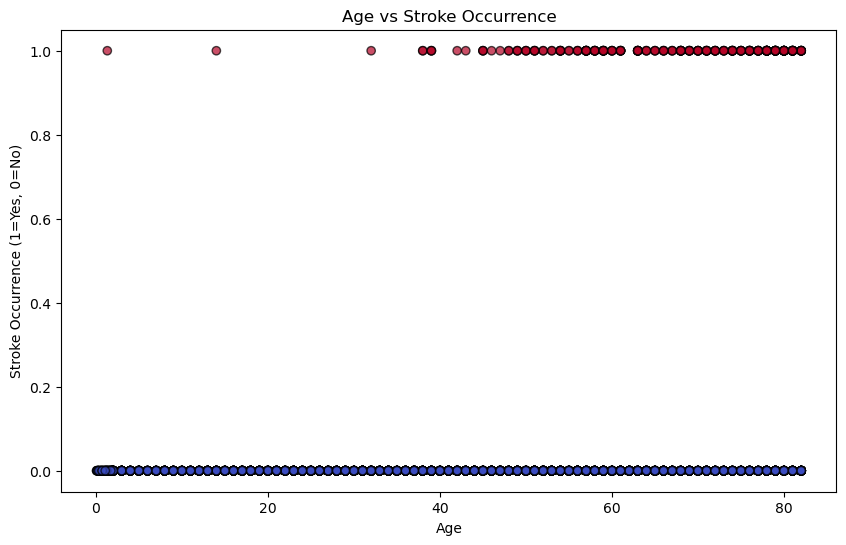

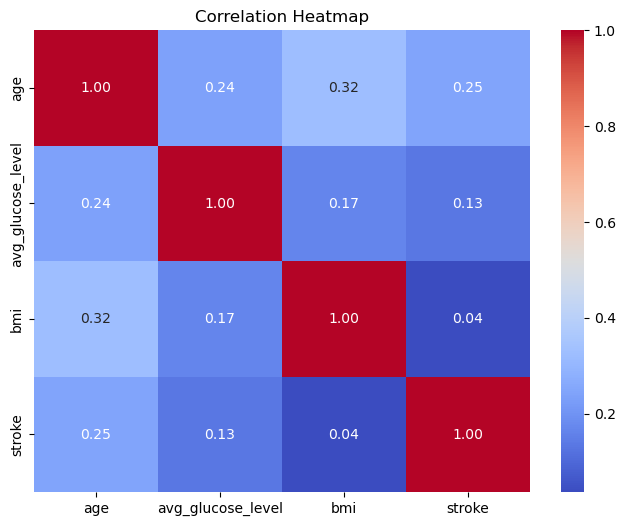

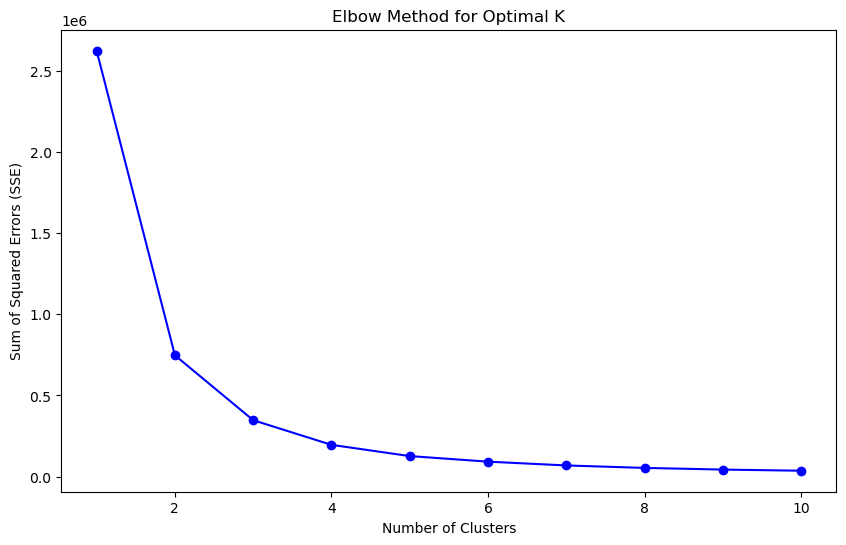

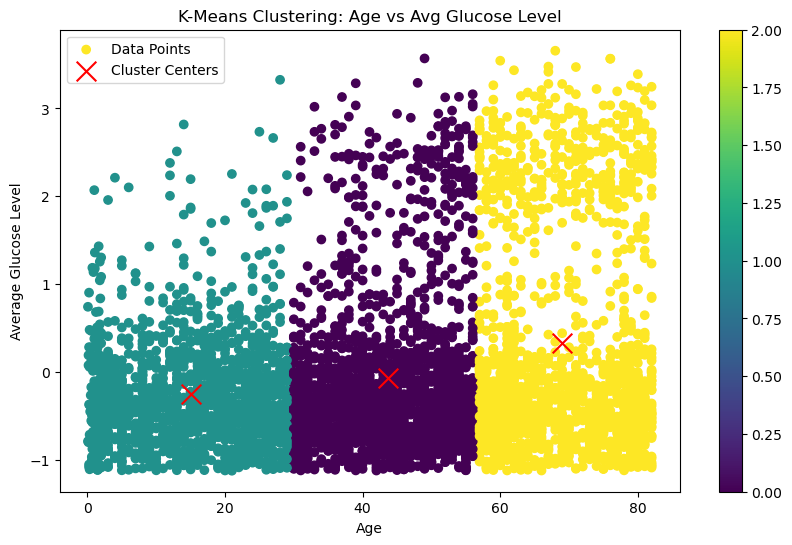

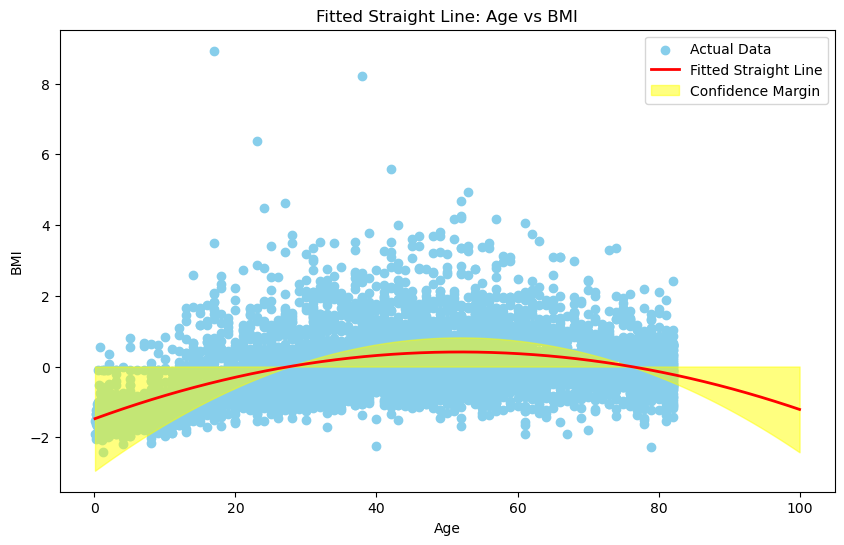

In [146]:
'''
Clustering and Fitting assignment

author@: Chandrasekhar Kolli
'''

#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

# Load and preprocess the dataset
def load_and_preprocess_data(filepath):
    """
    Load the healthcare dataset and preprocess it by handling missing values,
    encoding categorical variables, and scaling numerical features.
    
    Args:
        filepath (str): The path to the CSV file.
        
    Returns:
        pd.DataFrame: The cleaned and preprocessed DataFrame.
    """
    # Load dataset
    df = pd.read_csv(filepath)
    
    # Handle missing values (fix the FutureWarning)
    df['bmi'] = df['bmi'].replace('N/A', np.nan)  # Replace 'N/A' with NaN
    df['bmi'] = df['bmi'].fillna(df['bmi'].median())  # Fill missing BMI values with the median
    
    # Encode categorical variables
    df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
    df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
    df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})
    
    # Normalize only 'bmi' and 'avg_glucose_level' columns
    scaler = StandardScaler()
    df[['avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['avg_glucose_level', 'bmi']])
    
    return df




# Plot a histogram of BMI
def plot_bmi_histogram(df):
    """
    Create and display a histogram of the BMI column in the dataset.
    
    Args:
        df (pd.DataFrame): The cleaned DataFrame.
    """
    plt.figure(figsize=(10,6))
    plt.hist(df['bmi'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of BMI')
    plt.xlabel('BMI')
    plt.xlim(0, df['bmi'].max())
    plt.ylabel('Frequency')
    plt.show()

# Create a scatter plot for age vs stroke occurrence
def plot_age_vs_stroke(df):
    """
    Create and display a scatter plot of age vs stroke occurrence.
    
    Args:
        df (pd.DataFrame): The cleaned DataFrame.
    """
    plt.figure(figsize=(10,6))
    plt.scatter(df['age'], df['stroke'], c=df['stroke'], cmap='coolwarm', edgecolor='k', alpha=0.7)
    plt.title('Age vs Stroke Occurrence')
    plt.xlabel('Age')
    plt.ylabel('Stroke Occurrence (1=Yes, 0=No)')
    plt.show()

# Plot a heatmap of correlation between selected features
def plot_correlation_heatmap(df):
    """
    Create and display a heatmap of the correlation matrix between numerical features.
    
    Args:
        df (pd.DataFrame): The cleaned DataFrame.
    """
    correlation_matrix = df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Plot the elbow plot to determine the optimal number of clusters
def plot_elbow_method(df):
    """
    Create and display the elbow plot to find the optimal number of clusters for K-Means.
    
    Args:
        df (pd.DataFrame): The cleaned DataFrame.
    """
    sse = []
    X = df[['age', 'avg_glucose_level', 'bmi']]
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.show()


def plot_kmeans_clustering(df):
    """
    Perform K-Means clustering and display the resulting clusters on a scatter plot,
    along with the cluster centers.
    
    Args:
        df (pd.DataFrame): The cleaned DataFrame.
    """
    X = df[['age', 'avg_glucose_level', 'bmi']]  # Selecting the features for clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize KMeans with 3 clusters
    df['cluster'] = kmeans.fit_predict(X)  # Perform clustering and assign labels to the DataFrame
    
    # Extract cluster centers
    centers = kmeans.cluster_centers_
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for the data points
    scatter = plt.scatter(df['age'], df['avg_glucose_level'], c=df['cluster'], cmap='viridis', label='Data Points')
    
    # Plot the cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
    
    # Title and labels
    plt.title('K-Means Clustering: Age vs Avg Glucose Level')
    plt.xlabel('Age')
    plt.ylabel('Average Glucose Level')
    
    # Adding color bar for clusters
    plt.colorbar(scatter)
    
    # Display the legend
    plt.legend()
    
    # Show the plot
    plt.show()



def plot_fitted_line(df):
    """
    Create and display a scatter plot of age vs bmi,
    along with a fitted straight line (age predicting bmi).
    
    Args:
        df (pd.DataFrame): The cleaned DataFrame.
    """

    def quadratic(x, a, b, c):
        return a*x**2 + b*x + c


    # Independent variable (age)
    x = df['age']  # Independent variable (age), as 2D array for regression
    y = df['bmi']  # Dependent variable (bmi)
    
    # Fit the curve
    params, cov = curve_fit(quadratic, x, y)

    # Future x values for prediction
    future_x = np.linspace(np.min(x), 100, 200)
    future_y = quadratic(future_x, *params)
    
    # Lower and Upper limits for confidence
    lower = future_y - quadratic(future_x, *(params + np.diag(cov) * 0.1))
    upper = future_y + quadratic(future_x, *(params + np.diag(cov) * 0.1))

    # Plot the actual data and the fitted straight line
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, color='skyblue', label='Actual Data')  # Scatter plot of the data
    plt.plot(future_x, future_y, color='red', linewidth=2, label='Fitted Straight Line')  # Fitted straight line
    plt.fill_between(future_x, lower, upper, color='yellow', alpha=0.5, label='Confidence Margin')
    plt.title('Fitted Straight Line: Age vs BMI')
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.legend()
    plt.show()


# Main function to execute all tasks
def main():
    """
    Main function to load the data, preprocess it, and execute all plotting functions.
    """
    # Load and preprocess data
    df = load_and_preprocess_data(r"D:\VS\Clustering&Fitting\healthcare-dataset-stroke-data.csv")
    
    # Plot Histogram
    plot_bmi_histogram(df)
    
    # Plot Scatter Plot
    plot_age_vs_stroke(df)
    
    # Plot Correlation Heatmap
    plot_correlation_heatmap(df)
    
    # Plot Elbow Method for K-Means
    plot_elbow_method(df)
    
    # Plot K-Means Clustering
    plot_kmeans_clustering(df)
    
    # Plot Fitted Line
    plot_fitted_line(df)

# Execute main function
if __name__ == "__main__":
    main()

